In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [2]:
# Load or simulate temperature data (replace with real data or API integration)
date_rng = pd.date_range(start='2024-10-14', end='2024-11-15', freq='H')
temperature_data = np.random.uniform(15, 35, size=(len(date_rng),))  # Simulated temperature data
data = pd.DataFrame({'Date': date_rng, 'Temperature': temperature_data})
data.set_index('Date', inplace=True)
print(data.head())  # Display the first few rows of the dataset


                     Temperature
Date                            
2024-10-14 00:00:00    24.549198
2024-10-14 01:00:00    27.594353
2024-10-14 02:00:00    34.528499
2024-10-14 03:00:00    17.887495
2024-10-14 04:00:00    21.951225


C:\Users\Hp\AppData\Local\Temp\ipykernel_2404\2540368158.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  date_rng = pd.date_range(start='2024-10-14', end='2024-11-15', freq='H')


In [3]:
# Function to create lagged features for time series data
def prepare_dataset(data, target_column, lag_hours):
    features, target = [], []
    for i in range(len(data) - lag_hours):
        features.append(data[i:i + lag_hours])
        target.append(data[i + lag_hours])
    return np.array(features), np.array(target)

# Create features and target for past 24 hours
lag_hours = 24  # Using the last 24 hours as input
features, target = prepare_dataset(data['Temperature'].values, 'Temperature', lag_hours)
print("Features Shape:", features.shape)
print("Target Shape:", target.shape)


Features Shape: (745, 24)
Target Shape: (745,)


In [4]:
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
print(f"x_train Shape: {x_train.shape}, y_train Shape: {y_train.shape}")
print(f"x_test Shape: {x_test.shape}, y_test Shape: {y_test.shape}")


x_train Shape: (596, 24), y_train Shape: (596,)
x_test Shape: (149, 24), y_test Shape: (149,)


In [5]:
# Initialize and train the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

# Predict on the test set
y_pred = model.predict(x_test)

# Calculate and display RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")


RMSE: 5.999917378409058


In [6]:
# Forecast for the next 24 hours
last_24_hours = data['Temperature'].iloc[-lag_hours:].values
forecasted_temperatures = []

for i in range(24):  # Predict hour by hour for the next day
    prediction = model.predict(last_24_hours.reshape(1, -1))
    forecasted_temperatures.append(prediction[0])
    last_24_hours = np.append(last_24_hours[1:], prediction)  # Update the rolling window

# Create a DataFrame for the forecast
forecast_dates = pd.date_range(data.index[-1] + pd.Timedelta(hours=1), periods=24, freq='H')
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecasted_Temperature': forecasted_temperatures})
forecast_df.set_index('Date', inplace=True)
print(forecast_df)


                     Forecasted_Temperature
Date                                       
2024-11-15 01:00:00               26.422252
2024-11-15 02:00:00               24.139190
2024-11-15 03:00:00               26.024295
2024-11-15 04:00:00               23.546813
2024-11-15 05:00:00               25.440707
2024-11-15 06:00:00               25.583157
2024-11-15 07:00:00               26.183358
2024-11-15 08:00:00               26.438425
2024-11-15 09:00:00               25.497555
2024-11-15 10:00:00               24.528519
2024-11-15 11:00:00               24.782125
2024-11-15 12:00:00               23.396756
2024-11-15 13:00:00               24.583714
2024-11-15 14:00:00               25.005917
2024-11-15 15:00:00               25.446431
2024-11-15 16:00:00               24.144069
2024-11-15 17:00:00               22.392705
2024-11-15 18:00:00               25.540264
2024-11-15 19:00:00               25.133591
2024-11-15 20:00:00               25.456753
2024-11-15 21:00:00             

C:\Users\Hp\AppData\Local\Temp\ipykernel_2404\2606935733.py:11: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  forecast_dates = pd.date_range(data.index[-1] + pd.Timedelta(hours=1), periods=24, freq='H')


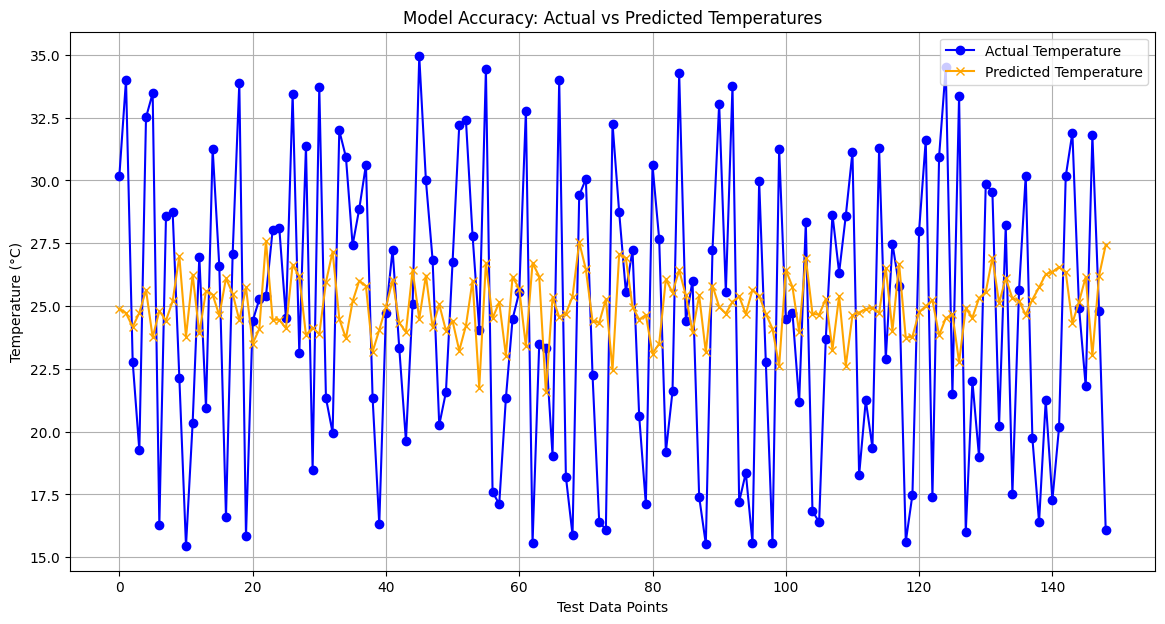

In [7]:
# Plot Actual vs Predicted Temperatures
plt.figure(figsize=(14, 7))
plt.plot(range(len(y_test)), y_test, label="Actual Temperature", color="blue", marker='o')
plt.plot(range(len(y_pred)), y_pred, label="Predicted Temperature", color="orange", marker='x')
plt.title('Model Accuracy: Actual vs Predicted Temperatures')
plt.xlabel('Test Data Points')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()
